Standard Deviation of Portfolio Algo1 {0.0076}
Standard Deviation of Portfolio Algo1 {0.0083}
Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC {0.0079}
Standard Deviation of Portfolio PAULSON & CO. INC. {0.007}
Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC {0.0109}
Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC {0.0129}
Standard Deviation of Portfolio S&P {0.0086}
-------------------
The following Portfolios have a standardard variation that is greater than S&P 500
TIGER GLOBAL MANAGEMENT
BERKSHIRE HATHAWAY
-------------------
Annualized Standard Deviation for Algo 1 is 0.1206
Annualized Standard Deviation for Algo 2 is 0.1318
Annualized Standard Deviation for SOROS FUND MANAGEMENT is 0.1254
Annualized Standard Deviation for PAULSON & CO is 0.1111
Annualized Standard Deviation for TIGER GLOBAL MANAGEMENT is 0.173
Annualized Standard Deviation for BERKSHIRE HATHAWAY is 0.2048
Annualized Standard Deviation for S&P 500 is 0.1365
-----------------------------

,Algo 1,Algo 2,SOROS,PAUL,TIGER,BERKSHIRE,S&P
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


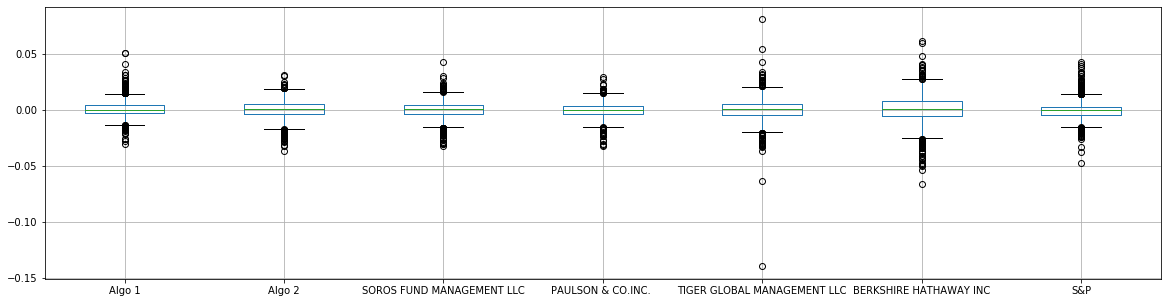

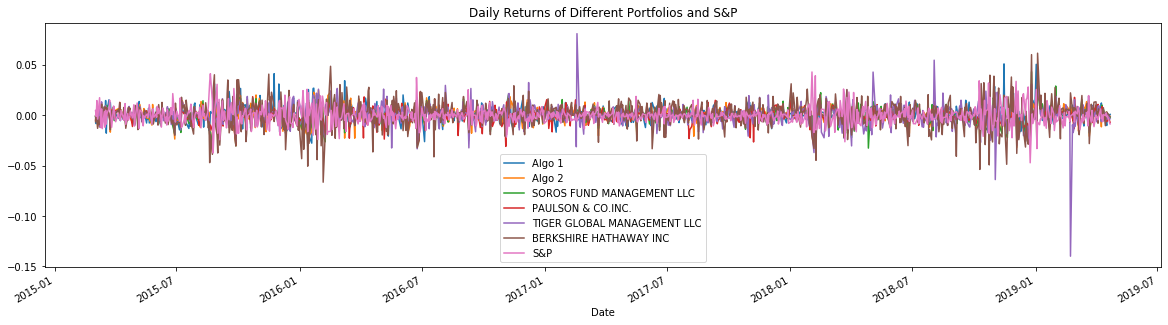

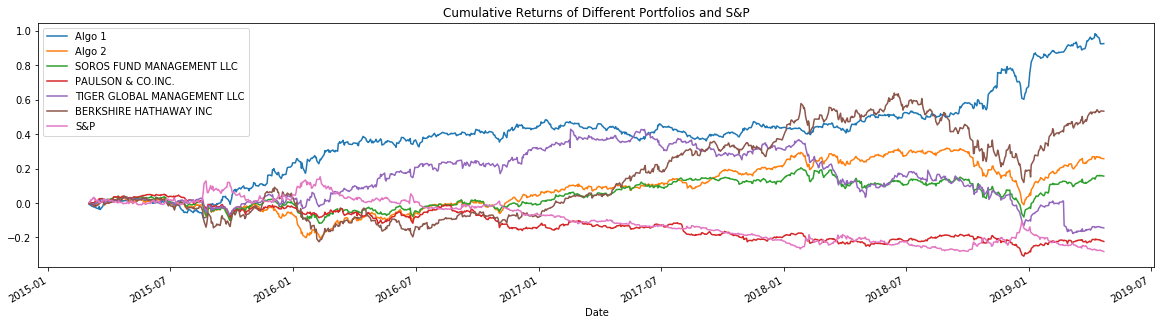

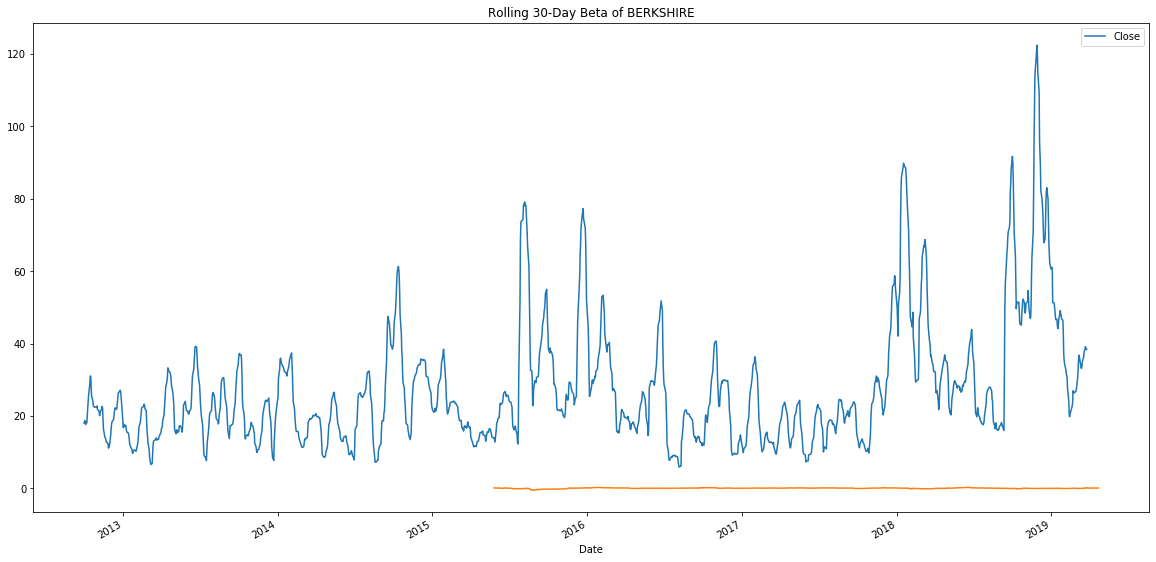

In [219]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

#FIRST CLEAN THE WHALE

# Use the Pathlib libary to set the path to the CSV
whale_returns_csv = Path("Resources/whale_returns.csv")

# Use the file path to read the CSV into a DataFrame and display a few rows
whale_df = pd.read_csv(whale_returns_csv)
whale_df.head()
# Checking the nulls
whale_df.isnull()
# Determining number of nulls
whale_df.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
whale_df.dropna(inplace=True)
whale_df.set_index(pd.to_datetime(whale_df['Date'],  infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)

#CLEAN THE ALGO

algo_returns_csv = Path("Resources/algo_returns.csv")

# Use the file path to read the CSV into a DataFrame and display a few rows
algo_df = pd.read_csv(algo_returns_csv)
algo_df.head()
# Checking the nulls
algo_df.isnull()
# Determining number of nulls
algo_df.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
algo_df.dropna(inplace=True)


algo_df.set_index(pd.to_datetime(algo_df['Date'],  infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)



# CLEAN S&P500 data
sp500_history_csv = Path("Resources/sp500_history.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
sp_df = pd.read_csv(sp500_history_csv)
sp_df.head()


#Remove $ sign from  and Change it to numberic

sp_df["Close"] = sp_df["Close"].str.replace('$','')
sp_df[["Close"]] = sp_df[["Close"]].apply(pd.to_numeric)




sp_df.set_index(pd.to_datetime(sp_df['Date'],  infer_datetime_format=True), inplace=True)
sp_df.drop(columns=['Date'], inplace=True)

daily_returns =sp_df.pct_change()
daily_returns.head()
daily_returns.isnull()
# Determining number of nulls
daily_returns.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

columns = ["S&P"]
daily_returns.columns = columns
daily_returns.head()
# Combining all the data with Dates
appended_data = pd.concat([algo_df, whale_df, daily_returns], axis="columns", join="inner")

boxplot=appended_data.boxplot(figsize=(20,5)) 
# Plotting the daily returns
appended_data.plot(figsize=(20,5),title="Daily Returns of Different Portfolios and S&P")

cumulative_returns = (1 + appended_data).cumprod() - 1
# Plotting cumulative return
cumulative_returns.plot(figsize=(20,5),title="Cumulative Returns of Different Portfolios and S&P")

 # Standard Deviation of Each Portfolio
columns = ["Algo 1", "Algo 2", "SOROS", "PAUL", "TIGER", "BERKSHIRE", "S&P"]
appended_data.columns = columns
appended_data.head()   


std_algo1=round(appended_data["Algo 1"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",{std_algo1})
std_algo2=round(appended_data["Algo 2"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",{std_algo2})    
std_sf=round(appended_data["SOROS"].std(),4)
print(f"Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC",{std_sf}) 
std_p=round(appended_data["PAUL"].std(),4)
print(f"Standard Deviation of Portfolio PAULSON & CO. INC.",{std_p}) 
std_gm=round(appended_data["TIGER"].std(),4)
print(f"Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC",{std_gm}) 
std_b=round(appended_data["BERKSHIRE"].std(),4)
print(f"Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC",{std_b}) 
std_sp=round(appended_data["S&P"].std(),4)
print(f"Standard Deviation of Portfolio S&P",{std_sp}) 
print("-------------------")
sd_all={}
sd_all={'Algo 1':std_algo1,'Algo 2':std_algo2, 'SOROS FUND MANAGEMENT':std_sf,'PAULSON & CO':std_p,'TIGER GLOBAL MANAGEMENT':std_gm, 'BERKSHIRE HATHAWAY':std_b, 'S&P 500':std_sp}
print("The following Portfolios have a standardard variation that is greater than S&P 500")

for key in sd_all:
    if sd_all[key]>sd_all['S&P 500']:
        print (key)
print("-------------------")        
for key in sd_all:
     asd=round(sd_all[key]*((252)**(1/2)),4)
     print ('Annualized Standard Deviation for '+key+' is', asd)    
   
    # Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window

sp_df.rolling(window=21).std().plot(figsize=(20,15),title="The rolling standard deviation for the S&PP 500 using a 21 day window")

     # Calculate and Rolling 30-Day Beta of BERKSHIRE
covariance = appended_data['BERKSHIRE'].rolling(window=60).cov(daily_returns['S&P'])
variance = appended_data['BERKSHIRE'].rolling(window=60).var()
berk_beta_30 = covariance / variance
berk_beta_30.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE')

## Correlation between each portfolio return with SP500

correlation = appended_data.corr()
print("-------------------------------")
print("SOROS and PAUL has a positive correaltion with S&P")
print(correlation )
print("---------------------------------")
print("Sharpe Ratio")
# Calculate Sharpe Ratio
print("--------------------------------")
sharpe_ratios = (appended_data.mean() * 252) / (appended_data.std() * np.sqrt(252))
print(sharpe_ratios)

appended_data.head()

#sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")